In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-fitting-tempinterp)

Here are 5-year averages of the worldwide temperature anomaly as compared to the 1951–1980 average (source: NASA).

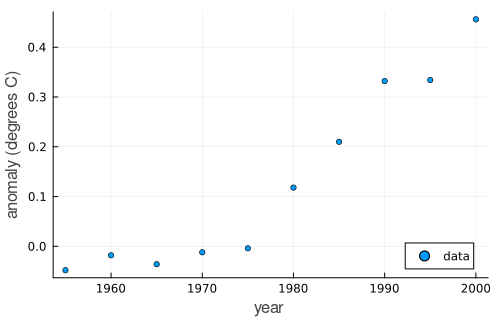

In [2]:
year = 1955:5:2000
temp = [ -0.0480, -0.0180, -0.0360, -0.0120, -0.0040,
       0.1180, 0.2100, 0.3320, 0.3340, 0.4560 ]
    
scatter(year, temp, label="data",
    xlabel="year", ylabel="anomaly (degrees C)", 
    legend=:bottomright)

A polynomial interpolant can be used to fit the data. Here we build one using a Vandermonde matrix. First, though, we express time as decades since 1950, as it improves the condition number of the matrix.

In [3]:
t = @. (year - 1950) / 10
n = length(t)
V = [ t[i]^j for i in 1:n, j in 0:n-1 ]
c = V \ temp

10-element Vector{Float64}:
  -14.114000001832462
   76.36173810552113
 -165.45597224550528
  191.96056669514388
 -133.27347224319684
   58.015577787494486
  -15.962888891734785
    2.6948063497166928
   -0.2546666667177082
    0.010311111113288083

```{index} Julia; plotting functions
```

The coefficients in vector `c` are used to create a polynomial. Then we create a function that evaluates the polynomial after changing the time variable as we did for the Vandermonde matrix.
```{tip}
:class: dropdown
If you `plot` a function, then the points are chosen automatically to make a smooth curve.
```

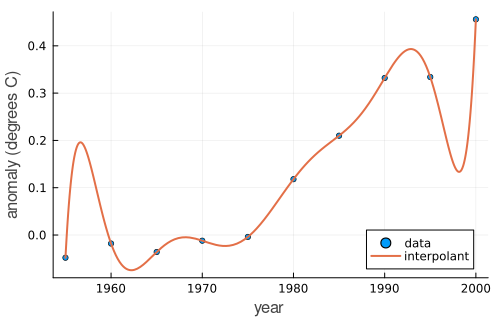

In [4]:
using Polynomials
p = Polynomial(c)
f = yr -> p((yr - 1950) / 10)
plot!(f, 1955, 2000, label="interpolant")

As you can see, the interpolant does represent the data, in a sense. However it's a crazy-looking curve for the application. Trying too hard to reproduce all the data exactly is known as _overfitting_.